In [1]:
import os
import csv

Open and read file

In [2]:
with open('./access.log') as f:
    contents = f.read()

In [3]:
len(contents)

1718628

this is a variable that contains a long string, the entire log file read into it.  it is 1.7M characters in this one long string.

Split contents at the \n character, breaking out each line

In [4]:
lines = contents.split('\n')

this is now a list that contains a string as each item in that list, each a string

In [5]:
len(lines)

13975

because it's a list, we can call the len to determine how many items are in that list, in this case 13975.

In [6]:
type(lines), type(lines[0])

(list, str)

View first 3 lines for inspection

In [7]:
lines[:3]

['97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] "GET /api/v1/sales?page=81 HTTP/1.1" 200 512495 "-" "python-requests/2.21.0"',
 '97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] "GET /api/v1/items HTTP/1.1" 200 3561 "-" "python-requests/2.21.0"',
 '97.105.19.58 - - [16/Apr/2019:19:34:44 +0000] "GET /api/v1/sales?page=82 HTTP/1.1" 200 510103 "-" "python-requests/2.21.0"']

Again, because its a list, we can call the first the list items, above.

Select only the first line

In [8]:
line = lines[0]

this creates a new list from the first line in the "lines" list of strings

In [9]:
line

'97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] "GET /api/v1/sales?page=81 HTTP/1.1" 200 512495 "-" "python-requests/2.21.0"'

Splitting that first line on the spaces, to see how many columns needed

In [10]:
line.split(' ')

['97.105.19.58',
 '-',
 '-',
 '[16/Apr/2019:19:34:42',
 '+0000]',
 '"GET',
 '/api/v1/sales?page=81',
 'HTTP/1.1"',
 '200',
 '512495',
 '"-"',
 '"python-requests/2.21.0"']

this splits that list into its individual list items, at the space character.  Each of these is callable, see below.

In [11]:
line.split()[0]

'97.105.19.58'

In [12]:
line.split()[1]

'-'

In [13]:
line.split()[3]

'[16/Apr/2019:19:34:42'

split line on space, ID relevant parts and discard others

In [14]:
def process_line(line: str):
    parts = line.split(' ')
    for i, part in enumerate(parts):
        print(i, part)

In [15]:
process_line(lines[0])

0 97.105.19.58
1 -
2 -
3 [16/Apr/2019:19:34:42
4 +0000]
5 "GET
6 /api/v1/sales?page=81
7 HTTP/1.1"
8 200
9 512495
10 "-"
11 "python-requests/2.21.0"


this now showes each part

now pull info out of it

create a function to pull this out and create and name columns

In [40]:
def process_line(line: str):
    parts = line.split(' ')
    ip = parts[0]
    timestamp = parts[3] + parts[4]
    timestamp = timestamp.replace('[','')
    timestamp = timestamp.replace(']','')
    request_method = parts[5]
    request_method = request_method.replace('"','')
    request_path = parts[6]
    protocol_version = parts[7]
    protocol_version = protocol_version.replace('"','')
    status_code = parts[8]
    size = parts[9]
    unknown = parts[10]
    unknown = unknown.replace('"','')
    user_agent = parts[11:]
    user_agent = ' '.join(user_agent)
    user_agent = user_agent.replace('"','')
    return dict(ip=ip, timestamp=timestamp,
                method=request_method,
                path=request_path,
                protocol=protocol_version,
                code=status_code,
                size=size,
                unknown=unknown,
                user_agent=user_agent)

In [43]:
df = pd.DataFrame([process_line(line) for line in lines])

above and below are the same thing

In [20]:
processed_lines = []
for line in lines:
    processed_lines.append(process_line(line))

instead of using this code immediately above, use the "df = pd.DataFrame..." above that one.

In [97]:
df.head()

,timestamp,code,ip,method,path,protocol,size,user_agent,hour,weekday
0,2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,python-requests/2.21.0,14,Tuesday
1,2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,python-requests/2.21.0,14,Tuesday
2,2019-04-16 14:34:44-05:00,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,python-requests/2.21.0,14,Tuesday
3,2019-04-16 14:34:46-05:00,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,python-requests/2.21.0,14,Tuesday
4,2019-04-16 14:34:48-05:00,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,python-requests/2.21.0,14,Tuesday


In [41]:
process_line(lines[0])

{'ip': '97.105.19.58',
 'timestamp': '16/Apr/2019:19:34:42+0000',
 'method': 'GET',
 'path': '/api/v1/sales?page=81',
 'protocol': 'HTTP/1.1',
 'code': '200',
 'size': '512495',
 'unknown': '-',
 'user_agent': 'python-requests/2.21.0'}

In [42]:
lines[173]

'97.105.19.58 - - [16/Apr/2019:19:38:16 +0000] "GET /api/V1/HiZach! HTTP/1.1" 200 162 "-" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36"'

In [18]:
lines[13974]

''

In [19]:
lines = lines[:-1]

In [21]:
processed_lines

[{'ip': '97.105.19.58',
  'timestamp': '16/Apr/2019:19:34:42+0000',
  'method': 'GET',
  'path': '/api/v1/sales?page=81',
  'protocol': 'HTTP/1.1',
  'code': '200',
  'size': '512495',
  'unknown': '-',
  'user_agent': 'python-requests/2.21.0'},
 {'ip': '97.105.19.58',
  'timestamp': '16/Apr/2019:19:34:42+0000',
  'method': 'GET',
  'path': '/api/v1/items',
  'protocol': 'HTTP/1.1',
  'code': '200',
  'size': '3561',
  'unknown': '-',
  'user_agent': 'python-requests/2.21.0'},
 {'ip': '97.105.19.58',
  'timestamp': '16/Apr/2019:19:34:44+0000',
  'method': 'GET',
  'path': '/api/v1/sales?page=82',
  'protocol': 'HTTP/1.1',
  'code': '200',
  'size': '510103',
  'unknown': '-',
  'user_agent': 'python-requests/2.21.0'},
 {'ip': '97.105.19.58',
  'timestamp': '16/Apr/2019:19:34:46+0000',
  'method': 'GET',
  'path': '/api/v1/sales?page=83',
  'protocol': 'HTTP/1.1',
  'code': '200',
  'size': '510003',
  'unknown': '-',
  'user_agent': 'python-requests/2.21.0'},
 {'ip': '97.105.19.58',
  

In [22]:
import pandas as pd
df = pd.DataFrame(processed_lines)
df.head()

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
0,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,16/Apr/2019:19:34:42+0000,-,python-requests/2.21.0
1,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,16/Apr/2019:19:34:42+0000,-,python-requests/2.21.0
2,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,16/Apr/2019:19:34:44+0000,-,python-requests/2.21.0
3,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,16/Apr/2019:19:34:46+0000,-,python-requests/2.21.0
4,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,16/Apr/2019:19:34:48+0000,-,python-requests/2.21.0


In [23]:
df.shape

(13974, 9)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Data columns (total 9 columns):
code          13974 non-null object
ip            13974 non-null object
method        13974 non-null object
path          13974 non-null object
protocol      13974 non-null object
size          13974 non-null object
timestamp     13974 non-null object
unknown       13974 non-null object
user_agent    13974 non-null object
dtypes: object(9)
memory usage: 982.6+ KB


In [25]:
df.describe()

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
count,13974,13974,13974,13974,13974,13974,13974,13974,13974
unique,2,19,1,218,1,187,9953,19,6
top,200,97.105.19.58,GET,/api/v1/sales?page=2,HTTP/1.1,494819,16/Apr/2019:19:56:10+0000,-,python-requests/2.21.0
freq,13958,11998,13974,709,13974,705,9,13949,12001


In [26]:
df.sample(10)

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
1096,200,97.105.19.58,GET,/api/v1/sales?page=2,HTTP/1.1,494819,16/Apr/2019:19:49:28+0000,-,python-requests/2.20.1
10567,200,97.105.19.58,GET,/api/v1/sales?page=52,HTTP/1.1,512589,16/Apr/2019:22:09:46+0000,-,python-requests/2.21.0
6364,200,97.105.19.58,GET,/api/v1/sales?page=182,HTTP/1.1,510540,16/Apr/2019:20:53:10+0000,-,python-requests/2.21.0
11846,200,97.105.19.58,GET,/api/v1/sales?page=85,HTTP/1.1,510753,16/Apr/2019:22:55:53+0000,-,python-requests/2.21.0
4142,200,97.105.19.58,GET,/api/v1/sales?page=2,HTTP/1.1,494819,16/Apr/2019:20:27:13+0000,-,python-requests/2.21.0
2380,200,97.105.19.58,GET,/api/v1/sales?page=106,HTTP/1.1,512773,16/Apr/2019:20:01:19+0000,-,python-requests/2.21.0
13020,200,72.181.113.170,GET,/api/v1/sales?page=82,HTTP/1.1,510103,17/Apr/2019:03:40:54+0000,-,python-requests/2.21.0
6670,200,97.105.19.58,GET,/api/v1/sales?page=17,HTTP/1.1,499050,16/Apr/2019:20:57:16+0000,-,python-requests/2.20.1
8502,200,97.105.19.58,GET,/api/v1/sales?page=10,HTTP/1.1,500113,16/Apr/2019:21:35:52+0000,-,python-requests/2.21.0
1778,200,97.105.19.58,GET,/api/v1/sales?page=7,HTTP/1.1,500637,16/Apr/2019:19:55:37+0000,-,python-requests/2.20.1


In [27]:
df.ip.unique()

array(['97.105.19.58', '3.92.201.136', '52.90.165.200', '3.88.129.158',
       '34.207.64.242', '54.172.14.223', '34.229.70.250',
       '35.175.171.137', '54.145.52.184', '52.87.230.102', '35.174.209.2',
       '72.181.105.81', '70.121.214.34', '68.201.219.223',
       '173.173.113.51', '72.181.113.170', '52.91.30.150', '24.26.242.9',
       '45.23.250.16'], dtype=object)

What does the unknown column mean?
it appears to be pages on the server that were requested.

In [28]:
df.unknown.unique()

array(['-', 'https://python.zach.lol/api/V1/HiZach!',
       'https://python.zach.lol/api/v1/stores?page=0',
       'https://python.zach.lol/api/v1/stores?page=1',
       'https://python.zach.lol/api/v1/stores?page=2',
       'https://python.zach.lol/api/v1/stores?page=999',
       'https://python.zach.lol/api/v1/items?page=0',
       'http://localhost:8889/notebooks/timeseries_acquisition.ipynb',
       'https://python.zach.lol/api/v1//api/v1/items?page=2',
       'https://python.zach.lol/api/v1//api/v1/items',
       'https://python.zach.lol/api/v1//api/v1/items/next_page',
       'https://python.zach.lol/api/v1/helloclass!',
       'https://python.zach.lol/api/v1/I_DIDNT_DO_IT!!!!',
       'http://localhost:8888/notebooks/acquire.ipynb',
       'https://python.zach.lol/api/v1/sales?page=3',
       'https://ds.codeup.com/8.3_Acquire/', 'https://python.zach.lol/',
       'https://python.zach.lol/api/v1/items',
       'https://python.zach.lol/api/v1/'], dtype=object)

In [29]:
df.unknown.value_counts()

-                                                               13949
https://python.zach.lol/                                            4
https://ds.codeup.com/8.3_Acquire/                                  3
https://python.zach.lol/api/v1/stores?page=1                        2
https://python.zach.lol/api/v1/                                     2
http://localhost:8889/notebooks/timeseries_acquisition.ipynb        1
https://python.zach.lol/api/v1/items?page=0                         1
https://python.zach.lol/api/v1//api/v1/items?page=2                 1
https://python.zach.lol/api/v1/I_DIDNT_DO_IT!!!!                    1
https://python.zach.lol/api/v1/stores?page=0                        1
https://python.zach.lol/api/v1/stores?page=2                        1
https://python.zach.lol/api/v1//api/v1/items                        1
https://python.zach.lol/api/v1/sales?page=3                         1
http://localhost:8888/notebooks/acquire.ipynb                       1
https://python.zach.

In [30]:
df.ip.value_counts()

97.105.19.58      11998
173.173.113.51     1059
72.181.113.170      613
72.181.105.81       246
68.201.219.223       21
24.26.242.9          21
35.175.171.137        2
52.87.230.102         2
70.121.214.34         2
35.174.209.2          1
52.90.165.200         1
54.172.14.223         1
34.229.70.250         1
45.23.250.16          1
34.207.64.242         1
52.91.30.150          1
3.88.129.158          1
3.92.201.136          1
54.145.52.184         1
Name: ip, dtype: int64

In [31]:
df.user_agent.value_counts()

python-requests/2.21.0    12001
python-requests/2.20.1     1911
Mozilla/5.0                  48
Slackbot-LinkExpanding        7
Slackbot                      6
Python-urllib/3.7             1
Name: user_agent, dtype: int64

In [45]:
df.timestamp = pd.to_datetime(df.timestamp.str.replace(':', ' ', 1))

In [46]:
df.head()

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
0,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,2019-04-16 19:34:42,-,python-requests/2.21.0
1,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,2019-04-16 19:34:42,-,python-requests/2.21.0
2,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,2019-04-16 19:34:44,-,python-requests/2.21.0
3,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,2019-04-16 19:34:46,-,python-requests/2.21.0
4,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,2019-04-16 19:34:48,-,python-requests/2.21.0


In [32]:
# df.timestamp = df['timestamp'].str.replace(':', ' ', 1)

In [33]:
# df.timestamp = pd.to_datetime(df['timestamp'])

In [34]:
# df['date_time'] = pd.to_datetime(df['timestamp'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Data columns (total 9 columns):
code          13974 non-null object
ip            13974 non-null object
method        13974 non-null object
path          13974 non-null object
protocol      13974 non-null object
size          13974 non-null object
timestamp     13974 non-null datetime64[ns]
unknown       13974 non-null object
user_agent    13974 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 982.6+ KB


In [48]:
df.head()

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
0,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,2019-04-16 19:34:42,-,python-requests/2.21.0
1,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,2019-04-16 19:34:42,-,python-requests/2.21.0
2,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,2019-04-16 19:34:44,-,python-requests/2.21.0
3,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,2019-04-16 19:34:46,-,python-requests/2.21.0
4,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,2019-04-16 19:34:48,-,python-requests/2.21.0


In [49]:
df.drop(['unknown'], axis=1, inplace=True)

In [50]:
df.head()

,code,ip,method,path,protocol,size,timestamp,user_agent
0,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,2019-04-16 19:34:42,python-requests/2.21.0
1,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,2019-04-16 19:34:42,python-requests/2.21.0
2,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,2019-04-16 19:34:44,python-requests/2.21.0
3,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,2019-04-16 19:34:46,python-requests/2.21.0
4,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,2019-04-16 19:34:48,python-requests/2.21.0


this resets the index to the timestamp

In [52]:
df = df.set_index('timestamp')

In [53]:
df.head()

,code,ip,method,path,protocol,size,user_agent
timestamp,,,,,,,
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,python-requests/2.21.0
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,python-requests/2.21.0
2019-04-16 19:34:44,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,python-requests/2.21.0
2019-04-16 19:34:46,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,python-requests/2.21.0


now we can slice into the timestamp, below:

In [55]:
df['2019']

,code,ip,method,path,protocol,size,user_agent
timestamp,,,,,,,
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,python-requests/2.21.0
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,python-requests/2.21.0
2019-04-16 19:34:44,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,python-requests/2.21.0
2019-04-16 19:34:46,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/stores,HTTP/1.1,1328,python-requests/2.21.0
2019-04-16 19:34:50,200,97.105.19.58,GET,/api/v1/sales?page=85,HTTP/1.1,510753,python-requests/2.21.0
2019-04-16 19:34:52,200,97.105.19.58,GET,/api/v1/sales?page=86,HTTP/1.1,510348,python-requests/2.21.0
2019-04-16 19:34:52,200,97.105.19.58,GET,/,HTTP/1.1,42,python-requests/2.21.0


In [57]:
df['2019-04-16 19']

,code,ip,method,path,protocol,size,user_agent
timestamp,,,,,,,
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,python-requests/2.21.0
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,python-requests/2.21.0
2019-04-16 19:34:44,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,python-requests/2.21.0
2019-04-16 19:34:46,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/stores,HTTP/1.1,1328,python-requests/2.21.0
2019-04-16 19:34:50,200,97.105.19.58,GET,/api/v1/sales?page=85,HTTP/1.1,510753,python-requests/2.21.0
2019-04-16 19:34:52,200,97.105.19.58,GET,/api/v1/sales?page=86,HTTP/1.1,510348,python-requests/2.21.0
2019-04-16 19:34:52,200,97.105.19.58,GET,/,HTTP/1.1,42,python-requests/2.21.0


this is a slice in between several hours

In [60]:
df['2019-04-16 19':'2019-04-16 21']

,code,ip,method,path,protocol,size,user_agent
timestamp,,,,,,,
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,python-requests/2.21.0
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,python-requests/2.21.0
2019-04-16 19:34:44,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,python-requests/2.21.0
2019-04-16 19:34:46,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/stores,HTTP/1.1,1328,python-requests/2.21.0
2019-04-16 19:34:50,200,97.105.19.58,GET,/api/v1/sales?page=85,HTTP/1.1,510753,python-requests/2.21.0
2019-04-16 19:34:52,200,97.105.19.58,GET,/api/v1/sales?page=86,HTTP/1.1,510348,python-requests/2.21.0
2019-04-16 19:34:52,200,97.105.19.58,GET,/,HTTP/1.1,42,python-requests/2.21.0


now can grab in hourly or minute based sets

In [61]:
df['size'] = df['size'].astype('int')

In [62]:
df.dtypes

code          object
ip            object
method        object
path          object
protocol      object
size           int64
user_agent    object
dtype: object

In [63]:
df['size'].resample('5min').sum()

timestamp
2019-04-16 19:30:00      5108561
2019-04-16 19:35:00    109583940
2019-04-16 19:40:00    147923501
2019-04-16 19:45:00    233684428
2019-04-16 19:50:00    254375516
2019-04-16 19:55:00    250629854
2019-04-16 20:00:00    251435920
2019-04-16 20:05:00    194763358
2019-04-16 20:10:00    145471906
2019-04-16 20:15:00     45042992
2019-04-16 20:20:00    137715116
2019-04-16 20:25:00    110938377
2019-04-16 20:30:00    100617959
2019-04-16 20:35:00    219777913
2019-04-16 20:40:00    247002050
2019-04-16 20:45:00    253479011
2019-04-16 20:50:00    247697289
2019-04-16 20:55:00    140189185
2019-04-16 21:00:00     87095504
2019-04-16 21:05:00    136623307
2019-04-16 21:10:00     88130495
2019-04-16 21:15:00    107872817
2019-04-16 21:20:00     67656495
2019-04-16 21:25:00    117392557
2019-04-16 21:30:00     99551009
2019-04-16 21:35:00    226520916
2019-04-16 21:40:00    158145891
2019-04-16 21:45:00    165141301
2019-04-16 21:50:00    185302535
2019-04-16 21:55:00    107449114


this is in megabites below, notice the / 1024 formula

In [64]:
df['size'].resample('5min').sum() / 1024 / 1024

timestamp
2019-04-16 19:30:00      4.871903
2019-04-16 19:35:00    104.507389
2019-04-16 19:40:00    141.070844
2019-04-16 19:45:00    222.858837
2019-04-16 19:50:00    242.591396
2019-04-16 19:55:00    239.019255
2019-04-16 20:00:00    239.787979
2019-04-16 20:05:00    185.740812
2019-04-16 20:10:00    138.732821
2019-04-16 20:15:00     42.956345
2019-04-16 20:20:00    131.335369
2019-04-16 20:25:00    105.799081
2019-04-16 20:30:00     95.956763
2019-04-16 20:35:00    209.596551
2019-04-16 20:40:00    235.559511
2019-04-16 20:45:00    241.736423
2019-04-16 20:50:00    236.222543
2019-04-16 20:55:00    133.694825
2019-04-16 21:00:00     83.060745
2019-04-16 21:05:00    130.294139
2019-04-16 21:10:00     84.047790
2019-04-16 21:15:00    102.875535
2019-04-16 21:20:00     64.522262
2019-04-16 21:25:00    111.954267
2019-04-16 21:30:00     94.939240
2019-04-16 21:35:00    216.027180
2019-04-16 21:40:00    150.819674
2019-04-16 21:45:00    157.491017
2019-04-16 21:50:00    176.718268
2019

this is time in gmt

In [65]:
df.index.min(), df.index.max()

(Timestamp('2019-04-16 19:34:42'), Timestamp('2019-04-17 12:55:14'))

total size in GB

In [67]:
gb_out = df['size'].sum() / 1024 / 1024 / 1024

In [68]:
gb_out

5.855144692584872

In [69]:
df.resample('H').count()

,code,ip,method,path,protocol,size,user_agent
timestamp,,,,,,,
2019-04-16 19:00:00,2244,2244,2244,2244,2244,2244,2244
2019-04-16 20:00:00,4587,4587,4587,4587,4587,4587,4587
2019-04-16 21:00:00,3430,3430,3430,3430,3430,3430,3430
2019-04-16 22:00:00,1684,1684,1684,1684,1684,1684,1684
2019-04-16 23:00:00,2,2,2,2,2,2,2
2019-04-17 00:00:00,8,8,8,8,8,8,8
2019-04-17 01:00:00,380,380,380,380,380,380,380
2019-04-17 02:00:00,284,284,284,284,284,284,284
2019-04-17 03:00:00,807,807,807,807,807,807,807


In [70]:
df.path.resample('H').count()

timestamp
2019-04-16 19:00:00    2244
2019-04-16 20:00:00    4587
2019-04-16 21:00:00    3430
2019-04-16 22:00:00    1684
2019-04-16 23:00:00       2
2019-04-17 00:00:00       8
2019-04-17 01:00:00     380
2019-04-17 02:00:00     284
2019-04-17 03:00:00     807
2019-04-17 04:00:00     209
2019-04-17 05:00:00     253
2019-04-17 06:00:00      15
2019-04-17 07:00:00       0
2019-04-17 08:00:00       0
2019-04-17 09:00:00       0
2019-04-17 10:00:00       1
2019-04-17 11:00:00       0
2019-04-17 12:00:00      70
Freq: H, Name: path, dtype: int64

In [73]:
df = df.tz_localize('utc').tz_convert('America/Chicago')

In [74]:
df.head()

,code,ip,method,path,protocol,size,user_agent
timestamp,,,,,,,
2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,python-requests/2.21.0
2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,python-requests/2.21.0
2019-04-16 14:34:44-05:00,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,python-requests/2.21.0
2019-04-16 14:34:46-05:00,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,python-requests/2.21.0
2019-04-16 14:34:48-05:00,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,python-requests/2.21.0


In [75]:
df['size'].resample('10min').sum()

timestamp
2019-04-16 14:30:00-05:00    114692501
2019-04-16 14:40:00-05:00    381607929
2019-04-16 14:50:00-05:00    505005370
2019-04-16 15:00:00-05:00    446199278
2019-04-16 15:10:00-05:00    190514898
2019-04-16 15:20:00-05:00    248653493
2019-04-16 15:30:00-05:00    320395872
2019-04-16 15:40:00-05:00    500481061
2019-04-16 15:50:00-05:00    387886474
2019-04-16 16:00:00-05:00    223718811
2019-04-16 16:10:00-05:00    196003312
2019-04-16 16:20:00-05:00    185049052
2019-04-16 16:30:00-05:00    326071925
2019-04-16 16:40:00-05:00    323287192
2019-04-16 16:50:00-05:00    292751649
2019-04-16 17:00:00-05:00    153606389
2019-04-16 17:10:00-05:00     86729127
2019-04-16 17:20:00-05:00    223730579
2019-04-16 17:30:00-05:00    150463850
2019-04-16 17:40:00-05:00     94024534
2019-04-16 17:50:00-05:00    129605712
2019-04-16 18:00:00-05:00            0
2019-04-16 18:10:00-05:00            0
2019-04-16 18:20:00-05:00            0
2019-04-16 18:30:00-05:00            0
2019-04-16 18:4

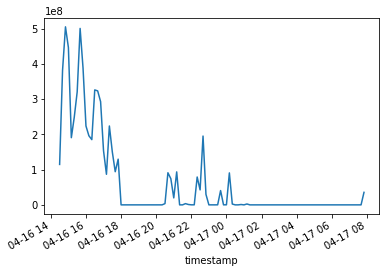

In [79]:
import matplotlib.pyplot as plt
df['size'].resample('10min').sum().plot()
plt.show()

lookup string functions here, very useful

In [80]:
df.reset_index(inplace=True)

In [82]:
df.timestamp.dt.hour

0        14
1        14
2        14
3        14
4        14
5        14
6        14
7        14
8        14
9        14
10       14
11       14
12       14
13       14
14       14
15       14
16       14
17       14
18       14
19       14
20       14
21       14
22       14
23       14
24       14
25       14
26       14
27       14
28       14
29       14
         ..
13944     7
13945     7
13946     7
13947     7
13948     7
13949     7
13950     7
13951     7
13952     7
13953     7
13954     7
13955     7
13956     7
13957     7
13958     7
13959     7
13960     7
13961     7
13962     7
13963     7
13964     7
13965     7
13966     7
13967     7
13968     7
13969     7
13970     7
13971     7
13972     7
13973     7
Name: timestamp, Length: 13974, dtype: int64

In [83]:
df.timestamp.dt.day

0        16
1        16
2        16
3        16
4        16
5        16
6        16
7        16
8        16
9        16
10       16
11       16
12       16
13       16
14       16
15       16
16       16
17       16
18       16
19       16
20       16
21       16
22       16
23       16
24       16
25       16
26       16
27       16
28       16
29       16
         ..
13944    17
13945    17
13946    17
13947    17
13948    17
13949    17
13950    17
13951    17
13952    17
13953    17
13954    17
13955    17
13956    17
13957    17
13958    17
13959    17
13960    17
13961    17
13962    17
13963    17
13964    17
13965    17
13966    17
13967    17
13968    17
13969    17
13970    17
13971    17
13972    17
13973    17
Name: timestamp, Length: 13974, dtype: int64

In [84]:
df.timestamp.dt.weekday

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
13944    2
13945    2
13946    2
13947    2
13948    2
13949    2
13950    2
13951    2
13952    2
13953    2
13954    2
13955    2
13956    2
13957    2
13958    2
13959    2
13960    2
13961    2
13962    2
13963    2
13964    2
13965    2
13966    2
13967    2
13968    2
13969    2
13970    2
13971    2
13972    2
13973    2
Name: timestamp, Length: 13974, dtype: int64

In [85]:
df.timestamp.dt.month

0        4
1        4
2        4
3        4
4        4
5        4
6        4
7        4
8        4
9        4
10       4
11       4
12       4
13       4
14       4
15       4
16       4
17       4
18       4
19       4
20       4
21       4
22       4
23       4
24       4
25       4
26       4
27       4
28       4
29       4
        ..
13944    4
13945    4
13946    4
13947    4
13948    4
13949    4
13950    4
13951    4
13952    4
13953    4
13954    4
13955    4
13956    4
13957    4
13958    4
13959    4
13960    4
13961    4
13962    4
13963    4
13964    4
13965    4
13966    4
13967    4
13968    4
13969    4
13970    4
13971    4
13972    4
13973    4
Name: timestamp, Length: 13974, dtype: int64

to add hour

In [86]:
df['hour'] = df.timestamp.dt.hour

In [87]:
df.head()

,timestamp,code,ip,method,path,protocol,size,user_agent,hour
0,2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,python-requests/2.21.0,14
1,2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,python-requests/2.21.0,14
2,2019-04-16 14:34:44-05:00,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,python-requests/2.21.0,14
3,2019-04-16 14:34:46-05:00,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,python-requests/2.21.0,14
4,2019-04-16 14:34:48-05:00,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,python-requests/2.21.0,14


In [90]:
df.groupby('hour')['size'].sum()

hour
0       94215009
1        2493970
5           1328
7       35494494
14    1001305800
15    2094131076
16    1546881941
17     838160191
18           204
19         18404
20     168931696
21     117840653
22     346620630
23      40818346
Name: size, dtype: int64

In [92]:
df['weekday'] = df.timestamp.dt.weekday_name

In [95]:
df.head(2)

,timestamp,code,ip,method,path,protocol,size,user_agent,hour,weekday
0,2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,python-requests/2.21.0,14,Tuesday
1,2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,python-requests/2.21.0,14,Tuesday


In [88]:
df.groupby('weekday')['size'].mean()

hour
0       94215009
1        2493970
5           1328
7       35494494
14    1001305800
15    2094131076
16    1546881941
17     838160191
18           204
19         18404
20     168931696
21     117840653
22     346620630
23      40818346
Name: size, dtype: int64

In [93]:
df.timestamp.dt.weekday_name

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
5          Tuesday
6          Tuesday
7          Tuesday
8          Tuesday
9          Tuesday
10         Tuesday
11         Tuesday
12         Tuesday
13         Tuesday
14         Tuesday
15         Tuesday
16         Tuesday
17         Tuesday
18         Tuesday
19         Tuesday
20         Tuesday
21         Tuesday
22         Tuesday
23         Tuesday
24         Tuesday
25         Tuesday
26         Tuesday
27         Tuesday
28         Tuesday
29         Tuesday
           ...    
13944    Wednesday
13945    Wednesday
13946    Wednesday
13947    Wednesday
13948    Wednesday
13949    Wednesday
13950    Wednesday
13951    Wednesday
13952    Wednesday
13953    Wednesday
13954    Wednesday
13955    Wednesday
13956    Wednesday
13957    Wednesday
13958    Wednesday
13959    Wednesday
13960    Wednesday
13961    Wednesday
13962    Wednesday
13963    Wednesday
13964    Wednesday
13965    Wed

In [39]:
df.to_csv('access_log.csv', index=False)